# Часть 1. Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Задание 1 ★☆☆

Изобразите график функции по заданным точкам x и y.
Подпишите оси, дайте название графику, изобразите сетку серым цветом прерывистой линией толщиной 0.3.  
Изобразите график в диапазоне $x$ от -20 до 20  и $y$ от -20 до 20.

In [2]:
t = np.linspace(-20, 20, 1000)
x = 16 * np.power(np.sin(t), 3)
y = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)

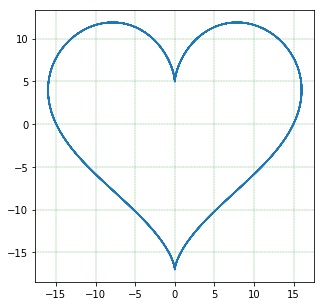

In [3]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.plot(x, y)
plt.grid(color='g', linestyle='--', linewidth=0.3)

# TODO

На что похож график функции?  
Варианты в форме:
   - цветок
   - вертикальная восьмерка
   - сердечко 
   - ничего из вышеперечисленного

# Задание 2 ★★☆

Изобразите 6 графиков (2 x 3) функции  
$$f(x) = \frac{15}{\sqrt{(225 - x^2)^2 + 4z^2x^2}}$$ 
для различных значений параметра $z$.   
Для каждого графика сделайте подписи осей, нарисуйте сетку, подпишите график в соответвии со значением параметра $z$ графики должны быть достаточно разнесены, так чтобы надписи не перекрывались. Все графики должны быть в одинаковом масштабе, выберете пределы изменений для $x$ и $y$ самомтоятельно.

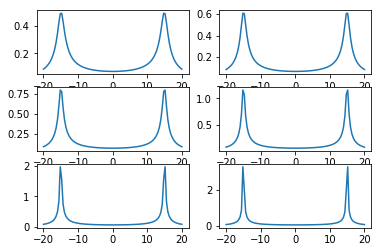

In [4]:
x = np.linspace(-20,20,100)
z = np.linspace(0, 1, 6)[::-1]
def y(xx,zz):
    return 15./np.sqrt(pow(225-xx*xx, 2) + pow(2*xx*zz,2))

fig = plt.figure()
ax1=fig.add_subplot(3, 2, 1)
axes=[ax1]
for i in range(2,7):
    axes.append(fig.add_subplot(3, 2, i, sharex=ax1))

line=1
for zi in z:
    axes[line-1].plot(x, y(x,zi))
    line+=1
    
plt.show()
# TODO

Какое физическое явление иллюстрируют эти графики?  
Варианты в форме:
   -  биения
   -  резонанс  
   -  свободные колебания
   -  затухание

# Часть 2. Seaborn 

В этой части задания попробуйте использовать `seaborn`.

In [5]:
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")

Проанализируем данные из уже знакомого [детесета](https://archive.ics.uci.edu/ml/datasets/Student+Performance#), в котором содержатся данные об успеваемости учеников старших классов.
Описание полей вы можете найти на [сайте](https://archive.ics.uci.edu/ml/datasets/Student+Performance#)

Считайте файл в переменную `data`.

In [36]:
data = pd.read_csv('data/student-mat.csv', sep=";")

In [37]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Задание  3 ★☆☆

Посмотрите на распределение девочек и мальчиков

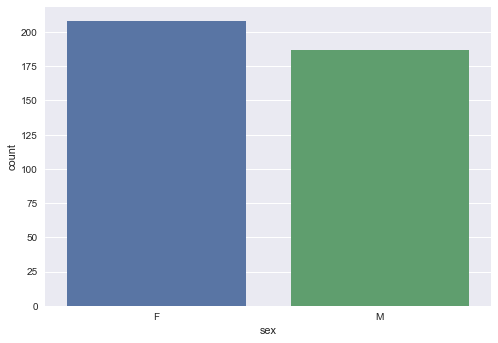

In [38]:
sns.countplot(x="sex", data=data);

В данной выборке больше:
   - девочек
   - мальчиков
   - одинаковое количество девочек и мальчиков

# Задание 4 ★☆☆

Визуализируйте распределение уровня образования родителей (матери и отца отдельно). Воспользуйтесь библиотекой `seaborn`.

In [39]:
m = pd.DataFrame(data['Medu']).rename(index=str, columns={"Medu": "number"})
m['Parent']='M'
f = pd.DataFrame(data['Fedu']).rename(index=str, columns={"Fedu": "number"})
f['Parent']='F'
mf = m.append(f, ignore_index=True)

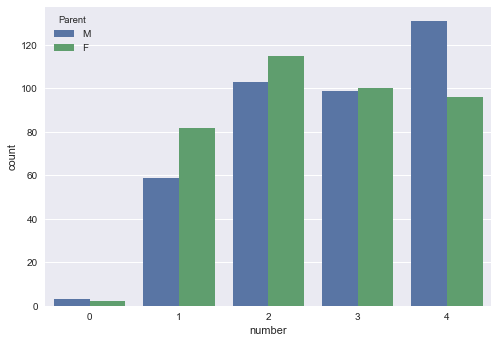

In [40]:
sns.countplot(x="number", data=mf, hue='Parent');

Выберете верные утверждения:
   - среди мам больше тех, кто имеет высшее образование 
   - среди пап больше тех, кто имеет высшее образование
   - среди пап большинство имеют 9 классов образования 
   - среди мам большинство имеют 9 классов образования 

In [42]:
# yes
# no
# yes
# no

# Задание 5 ★★☆

Посмотрите на распределение оценок 'G3' в зависимости от желания получать высшее образования (higher). Воспользуйтесь `FacetGrid`, а затем `kdeplot` (смотри семинар), также воспользуйтесь `boxplot`.

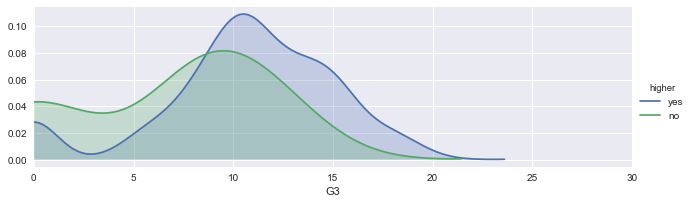

In [51]:
# инициализируем рисунок с помощью FacetGrid
# FacetGrid позволяет отображать разные подмножества с отрисовкой в разные цвет
# нам нужно на одном грфике отобразить два распределения по признаку sex
fg = sns.FacetGrid(data, hue="higher", aspect=3, xlim=(0, 30))
# теперь мы ходим построить sns.kdeplot который применим к каждому подмножеству данных
# shape = True закрашивает облать под графиков
fg.map(sns.kdeplot, "G3", shade=True).add_legend();

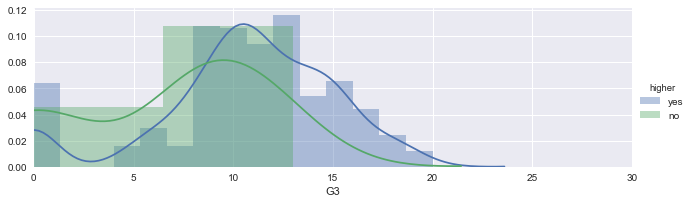

In [58]:
fg = sns.FacetGrid(data, hue="higher", aspect=3, xlim=(0, 30))
fg.map(sns.distplot, "G3").add_legend();

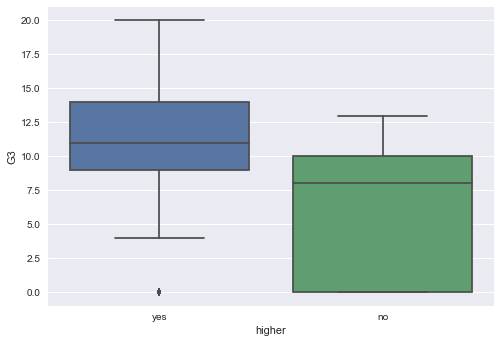

In [53]:
sns.boxplot(x="higher", y="G3", data=data);

Выберете верное утверждениe\ия:
   - медиана оценки для тех, кто хочет получать высшее образования выше, чем у остальных 
   - медиана оценки для тех, кто хочет получать высшее образования ниже, чем у остальных 
   - межквартильный размах по оценкам шире у тех, кто хочет получать высшее образования  
   - межквартильный размах по оценкам шире у тех, кто не хочет получать высшее образования  

In [59]:
# yes
# no
# yes
# no

# Задание 6 ★★☆

Постройте `pointplot`, который отражает зависимость финальных оценок `G3` от того, кто опекун и раздельно или нет живут родители на одном графике. Отберите только те данные, для которых опекун или отец или мать.

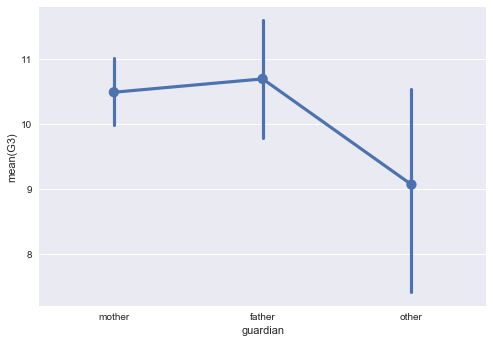

In [65]:
sns.pointplot(x='guardian', y='G3', data=data)

Выберете верное утверждение\ия:  
   - по графику видно, что среднее значение оценки выше у тех, кто воспитывается только матерью 
   - по графику видно, что медиана оценки ниже у тех, кто воспитывается только отцом
   - по графику видно, что доверительный интервал для оценок детей из полных семей меньше, чем у неполных 
   - по графику видно, что стандартное отклонение для оценок детей из неполных семей больше, чем у полных семей

In [ ]:
no


# Задание 7 ★☆☆

Постройте линейную регрессию зависимости G3 от studytime (`lmplot` или `regplot`).

In [9]:
# TODO

Выберете верное утверждение\ия:  
   - полученная зависимость иллюстрирует положительную зависимость между учебным временем и оценкой
   - полученная зависимость иллюстрирует отрицательную зависимость между учебным временем и оценкой

# Задание 8 ★☆☆

Посмотрите как доступность интернета ('internet') влияет на успеваемость ('G3'). Постройте boxplot посмотрите на медиану оценок.

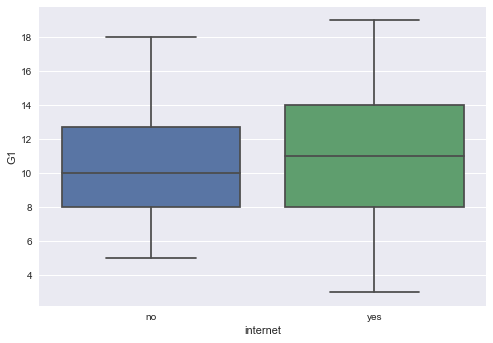

In [55]:
sns.boxplot(x='internet', y='G1', data=data)

Выберете верное утверждение\ия:
   - медиана оценки для тех, у кого есть доступ к интернету дома выше, чем у тех, у кого доступа нет  
   - медиана оценки для тех, у кого нет доступа к интернету дома выше, чем у тех, у кого доступ есть

In [56]:
# yes
# no